# Задача 1. Минимизация гладкой функции

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution

## Определение исходной функции:

In [2]:
def math_func(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2) 

In [3]:
N = 1000
X = np.linspace(1, 30, N)
F = np.zeros(N)
for i in range(N):
    F[i] = math_func(X[i])

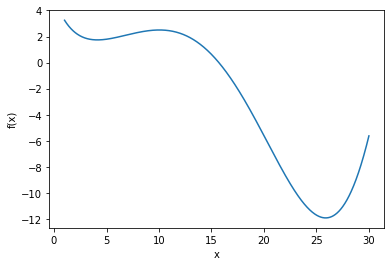

In [4]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(X, F)

Графически видно, что глобальный минимум находится между точек x = 25 и x = 30.
Попробуем найти данный минимум с помощью функции scipy.optimize.minimize (Градиентный спуск). При этом начальное приближение выберем равное x0 = 2
и метод оптимизации BFGS:

In [5]:
min_func = minimize(math_func, x0=2, method='BFGS')
min_func

      fun: 1.7452682903447336
 hess_inv: array([[5.98752645]])
      jac: array([-2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627628])

Результаты при заданном приближении дают решение локального минимума. Если изменять начальное приближение x0, то отчетливо видно, что функция попадая в локальный минимум некоторое значение x остается в нем, пока не приблизится к значению x0 = 25.

In [6]:
min_func = minimize(math_func, x0=30, method='BFGS')
min_func

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])

Результаты при другом приближении дают решение глобального минимума

# Задача 2. Минимизация гладкой функции

Рассмотрим работы дифферинциальной эфолюции при оптимизационной задаче:

In [8]:
min_func = differential_evolution(math_func, [(1, 30)])
min_func

     fun: array([-11.89889467])
     jac: array([3.01980638e-06])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 5
 success: True
       x: array([25.88019783])

В этом примере дифференциальная эволюция успешно справляется с тем, чтобы найти минимум функции f(x). При этом найденный минимум – глобальный. Это достигается благодаря тому, что за счет стадии мутации в дифференциальную эволюцию уже встроена возможность “выбивания” из локальных минимумов функции.
Стоит также заметить, что количетсво итераций, требуемое на работу алгоритма BFGS (градиентного спуска) требуется в 10 раз меньше, чем для диффиренциального алгоритма.

# Задача 3. Минимизация гладкой функции

## Переопределение исходной функции:

In [19]:
def math_func_int(f):
    return np.round(f)

In [20]:
H = math_func_int(F)

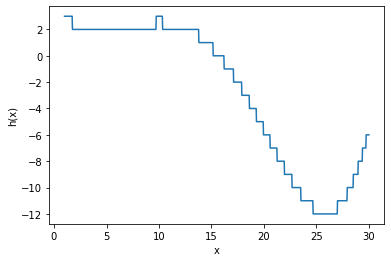

In [21]:
plt.xlabel('x')
plt.ylabel('h(x)')
plt.plot(X, H)

Получившиеся функция является негладкой.
Попробуем найти минимум функции с помощью BFGS в точке начального приближения x0 = 30, а также с помощью алгоритма дифферинциальной эволюции:

In [23]:
min_func = minimize(math_func_int, x0=30, method='BFGS')
min_func

      fun: 30.0
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

In [24]:
min_func = differential_evolution(math_func, [(1, 30)])
min_func

     fun: array([-11.89889467])
     jac: array([1.42108535e-06])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 4
 success: True
       x: array([25.88019581])

В случае негладкой функции градиентный спуск сразу же в точки начального приближения объявляет о том, что это минимум. Это происходит из-за того, участок между разрывами постоянен, а производную в разрыве не существует.
Диффиренциальный алгоритм с данной задачей справляется также успешно, как и в предыдущий раз.